# HW 04 - Applied ML

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from numpy import unravel_index
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

from sklearn_pandas import DataFrameMapper

In [2]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv', index_col='playerShort')
df.sample(10)

,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,,,,,,,,,,,,,,,
helder-postiga,Hélder Postiga,Real Zaragoza,Spain,02.08.1982,182.0,74.0,Center Forward,2,0,1,...,0.25,3025,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
philipp-wollscheid,Philipp Wollscheid,Bayer Leverkusen,Germany,06.03.1989,194.0,88.0,Center Back,1,1,0,...,0.00,1173,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
oriol-romeu,Oriol Romeu,Chelsea FC,England,24.09.1991,182.0,79.0,Defensive Midfielder,1,1,0,...,0.25,2291,48,ITA,0.386174,1761.0,0.000232,0.529815,1895.0,0.001091
muniain,Muniain,Athletic Bilbao,Spain,19.12.1992,169.0,63.0,Right Winger,9,4,3,...,0.00,468,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
puyol,Puyol,FC Barcelona,Spain,13.04.1978,178.0,80.0,Center Back,16,7,4,...,0.00,139,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
vasilis-pliatsikas,Vasilis Pliatsikas,FC Schalke 04,Germany,14.04.1988,174.0,73.0,Defensive Midfielder,2,1,1,...,0.25,1679,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
christian-fuchs,Christian Fuchs,FC Schalke 04,Germany,07.04.1986,186.0,84.0,Left Fullback,1,0,0,...,0.00,1214,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
luis-suarez_5,Luis Suárez,Liverpool FC,England,24.01.1987,182.0,81.0,Right Winger,1,0,1,...,0.25,1456,40,SWE,0.340205,5223.0,0.000081,0.626401,5621.0,0.000373
bruno-gama,Bruno Gama,Deportivo La Coruña,Spain,15.11.1987,175.0,68.0,Right Winger,1,0,0,...,0.25,3128,52,RUS,0.398174,526.0,0.000809,1.212727,550.0,0.004521


In [91]:
# Remove columns with no rating
df = df.dropna(subset=['rater1', 'rater2'])
df['rating'] = df.rater1 + df.rater2

lim = df.drop(['player',
               'club',
               'leagueCountry',
               'birthday',
               'height',
               'weight',
               'position',
               'rater1',
               'rater2',
               'Alpha_3',
               'photoID'], axis=1)

lim.sample(10)

,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,rating
playerShort,,,,,,,,,,,,,,,,,
pavel-pogrebnyak,1,1,0,0,0,0,0,0,816,65,0.379424,925.0,0.000464,0.559375,960.0,0.001927,0.00
pedro_7,1,1,0,0,0,0,0,0,1412,136,0.068922,5.0,0.128960,0.333333,6.0,0.136083,0.25
jerome-thomas,1,1,0,0,0,0,0,0,1910,44,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037,1.00
steven-davis_2,1,1,0,0,0,0,0,0,758,8,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0.00
florent-balmont,1,1,0,0,0,0,0,0,1663,111,0.378581,332.0,0.001191,0.531609,348.0,0.004260,0.00
ahmed-kantari,3,1,1,1,1,1,0,0,2412,7,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,0.50
olivier-sorlin,11,3,6,2,0,1,0,0,409,7,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,0.00
ivan-obradovic,1,1,0,0,0,0,0,0,1005,84,0.452175,193.0,0.002289,1.323383,201.0,0.012176,0.25
filip-daems,1,0,1,0,0,0,0,0,2010,15,0.354707,656.0,0.000606,0.182081,692.0,0.002717,0.00


In [92]:
X = np.asanyarray(lim[[column for column in lim.columns if column != 'rating']])
y = np.asarray(lim['rating'] * 4, dtype="int")

for col in range(len(X[0])):
    col_mean = np.nanmean(X[:, col])
    X[:, col][np.isnan(X[:, col])] = col_mean

In [93]:
rfc = RandomForestClassifier(
    n_estimators=9,
    criterion='gini',  # or 'entropy' ?
    max_features=None,
    max_depth=5,
)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [95]:
rfc.fit(X_train,
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
y_pred = rfc.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.331140069329


In [97]:
rfc.feature_importances_

array([ 0.05023711,  0.03859352,  0.00130633,  0.00255865,  0.03782842,
        0.00405519,  0.00122674,  0.        ,  0.01657555,  0.2072468 ,
        0.01791405,  0.04324654,  0.16060288,  0.25646222,  0.06387119,
        0.09827481])

In [98]:
sdf = df.reset_index().groupby('playerShort')

In [99]:
feature_function_mapper = {
    'height': np.average,
    'weight': np.average,
    'victories': np.sum,
    'ties': np.sum,
    'defeats': np.sum,
    'goals': np.sum,
    'yellowCards': np.sum,
    'yellowReds': np.sum,
    'redCards': np.sum,
    'rating': np.average,
    'meanIAT': np.average,
    'nIAT': np.average,
    'seIAT': lambda x: np.sqrt(np.average(np.square(x))),
    'meanExp': np.average,
    'nExp': np.average,
    'seExp': lambda x: np.sqrt(np.average(np.square(x))),
} # meanIAT	nIAT	seIAT	meanExp	nExp	seExp

sdf_agg = sdf.agg(feature_function_mapper)
sdf_agg

,victories,seExp,yellowCards,goals,ties,weight,yellowReds,meanIAT,height,nIAT,seIAT,meanExp,nExp,defeats,rating,redCards
playerShort,,,,,,,,,,,,,,,,
aaron-hughes,247,0.027536,19,9,179,71.0,0,0.346459,182.0,19710.156627,0.003315,0.494575,20637.277108,228,0.25,0
aaron-hunt,141,0.002506,42,62,73,73.0,0,0.348818,183.0,26104.292929,0.000543,0.449220,26864.454545,122,0.25,1
aaron-lennon,200,0.008914,11,31,97,63.0,0,0.345893,165.0,21234.861386,0.001268,0.491482,22238.742574,115,0.50,0
aaron-ramsey,150,0.104541,31,39,42,76.0,0,0.346821,178.0,38285.826923,0.028116,0.514693,39719.980769,68,0.00,1
abdelhamid-el-kaoutari,41,0.023426,8,1,40,73.0,4,0.331600,180.0,2832.351351,0.006309,0.335587,2953.837838,43,0.50,2
abdou-traore_2,41,0.029404,11,3,23,74.0,1,0.320079,180.0,4523.666667,0.012160,0.296562,4741.404762,33,1.50,0
abdoulaye-diallo_2,8,0.001499,0,0,8,80.0,0,0.341625,189.0,2646.700000,0.000353,0.400818,2762.500000,8,1.75,0
abdoulaye-keita_2,0,0.002139,0,0,1,83.0,0,0.355406,188.0,1728.000000,0.000516,0.417225,1808.500000,2,1.75,0
abdoulwhaid-sissoko,34,0.000771,21,3,25,68.0,0,0.348178,180.0,2470.196429,0.000184,0.429630,2593.214286,62,2.00,2


In [100]:
X = np.asanyarray(sdf_agg[[column for column in sdf_agg.columns if column != 'rating']])
y = np.asarray(sdf_agg['rating'] * 4, dtype="int")

for col in range(len(X[0])):
    col_mean = np.nanmean(X[:, col])
    X[:, col][np.isnan(X[:, col])] = col_mean

In [101]:
#Max features for RFC is 15 since rating feature is in y and the remaining 15 features are in X
rfc = RandomForestClassifier(
    n_estimators=9,
    criterion='gini',  # or 'entropy' ?
    max_features=15,
    max_depth=2,
)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [103]:
rfc.fit(X_train,
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=15, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
y_pred = rfc.predict(X_test)
y_compare = rfc.predict(X_train)
print(sklearn.metrics.accuracy_score(y_test, y_pred), sklearn.metrics.accuracy_score(y_train, y_compare))

0.324937027708 0.346801346801


In [105]:
rfc.feature_importances_

array([ 0.        ,  0.20961942,  0.04236128,  0.        ,  0.        ,
        0.        ,  0.03902232,  0.10300728,  0.        ,  0.038338  ,
        0.21751598,  0.16500261,  0.04545377,  0.11426332,  0.02541601])

Cross Validation

In [106]:
from sklearn.cross_validation import cross_val_score

scores = np.mean(cross_val_score(rfc, X, y, cv = 10))

In [107]:
print(scores)

0.332675502543


In [197]:
#Cross Validation function for testing different parameter combinations
def RandomForestClassifier_CrossValidation(n_estimators_max, n_features_max, max_depth, folds):

    max_k_scores = np.zeros(shape=(n_estimators_max, n_features_max))
    max_k = np.zeros(shape=(n_estimators_max, n_features_max))

    n_estimators_range = range(1,n_estimators_max+1)
    max_features_range = range(1,n_features_max+1)
    max_depth_range = range(1,max_depth+1)


    #loop over number of estimators
    for i in n_estimators_range:
        print("n_estimators = {}".format(i))
        #loop over max number of features
        for j in max_features_range:
            #loop over max depth
            k_scores = []
            for k in max_depth_range:
                #print(k)
                rfc = RandomForestClassifier(
                    n_estimators=i,
                    criterion='gini',  # or 'entropy' ?
                    max_features=j,
                    max_depth=k,
                )
                scores = np.mean(cross_val_score(rfc, X, y, cv = folds))
                k_scores.append(scores.mean())

            max_k_scores[i-1][j-1]=np.max(k_scores)
            max_k[i-1][j-1]=np.argmax(k_scores)+1

            
    #Find coordinates of max score and print
    x_max, y_max = unravel_index(np.argmax(max_k_scores), max_k_scores.shape)
    print(max_k_scores)
    print(max_k)
    print("max score : {}, best n_estimators : {}, best max_features : {}, best max_depth : {}, number of folds : {}"
          .format(max_k_scores[x_max][y_max], x_max+1, y_max+1, max_k[x_max][y_max], folds))
    
    best_n_estimators, best_max_features, best_max_depth = x_max+1, y_max+1, max_k[x_max][y_max]
    
    #Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X_plot = np.arange(0, n_features_max, 1)
    Y_plot = np.arange(0, n_estimators_max, 1)

    Z_plot = max_k_scores
    X_plot, Y_plot = np.meshgrid(X_plot, Y_plot)

    surf = ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('max_features')
    ax.set_zlabel('score')


    plt.show()
    
    return best_n_estimators, best_max_features, best_max_depth, max_k_scores

n_estimators = 1
n_estimators = 2
n_estimators = 3
n_estimators = 4
n_estimators = 5
n_estimators = 6
n_estimators = 7
n_estimators = 8
n_estimators = 9
n_estimators = 10
n_estimators = 11
n_estimators = 12
n_estimators = 13
n_estimators = 14
n_estimators = 15
[[ 0.30653503  0.3239956   0.31456146  0.31429875  0.31965208  0.32366793
   0.33137274  0.313953    0.31989124  0.3223047   0.317409    0.31855535
   0.3233867   0.31853506  0.31089869]
 [ 0.3164138   0.31511533  0.32398931  0.32230719  0.32148492  0.31874116
   0.32196608  0.31853331  0.32207101  0.32201744  0.32827507  0.3322045
   0.31894202  0.32861823  0.31905745]
 [ 0.31584585  0.32939912  0.32227992  0.32870184  0.33401875  0.31898223
   0.32130976  0.3311428   0.33404807  0.32434956  0.33075906  0.33785422
   0.32845481  0.32863939  0.33290231]
 [ 0.32446699  0.32368742  0.33587852  0.33511041  0.33046177  0.33196003
   0.32714735  0.32622269  0.3343685   0.32921508  0.32986817  0.32926482
   0.33076766  0.32935575  0.33

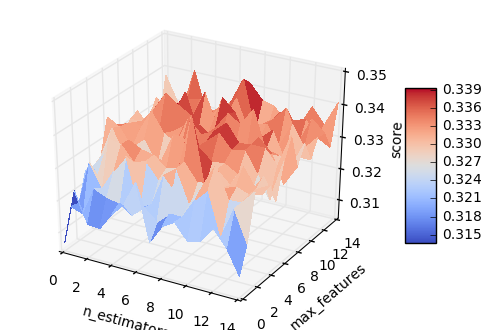

In [205]:
#Run cross validation to find optimal parameters for RFC
best_n_estimators, best_max_features, best_max_depth, max_scores = RandomForestClassifier_CrossValidation(15, len(X[0]), 7, 20)

3D array 

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [200]:
rfc = RandomForestClassifier(
    n_estimators=best_n_estimators,
    criterion='gini',  # or 'entropy' ?
    max_features=best_max_features,
    max_depth=best_max_depth,
)

In [201]:
rfc.fit(X_train,
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3.0, max_features=6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [202]:
y_pred = rfc.predict(X_test)
y_compare = rfc.predict(X_train)
print(sklearn.metrics.accuracy_score(y_test, y_pred), sklearn.metrics.accuracy_score(y_train, y_compare))

0.337531486146 0.364478114478


In [203]:
rfc.feature_importances_

array([ 0.03177233,  0.15126865,  0.02120948,  0.02044306,  0.08920802,
        0.04213037,  0.        ,  0.09573895,  0.05841874,  0.09855917,
        0.15902688,  0.13777867,  0.02789634,  0.06654935,  0.        ])

In [204]:
print(np.argmax(rfc.feature_importances_))

10
